In [1]:
import numpy as np
import pandas as pd

In [2]:
#线性回归模型主体
def liner_loss(X,y,w,b):
    '''
    输入：
    X：输入变量矩阵
    y：输出标签向量
    w：变量参数权重矩阵
    b：偏置
    输出：
    y_hat：线性回归模型预测值
    loss：均方损失
    dw：权重系数一阶偏导
    db：偏置一阶偏导
    '''
    num_train = X.shape[0]
    num_feature = X.shape[1]
    y_hat = np.dot(X,w)+b
    loss = np.sum((y_hat - y)**2 / num_train) 
    dw = np.dot(X.T, (y_hat - y)) / num_train #?
    db = np.sum((y_hat - y)) / num_train #?
    return y_hat,loss,dw,db

In [3]:
#初始化模型参数
def initialize_params(dims):
    '''
    输入：
    dims：训练数据的变量维度
    输出：
    w：初始化权重系数
    b：初始化偏置参数
    '''
    #初始化权重系数为零向量
    w = np.zeros((dims,1))
    #初始化偏置参数为零
    b = 0
    return w,b

In [4]:
#定义线性回归模型的训练过程
def linear_train(X,y,learning_rate=0.01,epochs=10000):
    '''
    输入：
    X：输入变量矩阵
    y：输出标签向量
    learning_rate:学习率
    epochs：训练迭代次数
    输出：
    loss_his:每次迭代的均方损失
    params：优化后的参数字典
    grads:优化后的参数梯度字典
    '''
    #记录训练损失的空列表
    loss_his = []
    w,b = initialize_params(X.shape[1])#10维度 初始化 w 10，1 的零矩阵 b=0
    #迭代训练
    for i in range(1,epochs):
        y_hat,loss,dw,db = liner_loss(X,y,w,b)
        w += -learning_rate * dw
        b += -learning_rate * db
        #记录当前迭代的损失
        loss_his.append(loss)
        if i % 10000 == 0:#每万次输出一次结果
            print('epoch %d loss %f' % (i,loss))
            params = {
                'w': w,
                'b': b
            }
            grads = {
                'dw': dw,
                'db': db
            }
    return loss_his,params,grads

In [5]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
data = diabetes.data
target = diabetes.target 
print(data.shape)
print(target.shape)
print(data[:5])
print(target[:5])

(442, 10)
(442,)
[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]
[151.  75. 141. 206. 135.]


In [6]:
load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [7]:
# 导入sklearn diabetes数据接口
from sklearn.datasets import load_diabetes
# 导入sklearn打乱数据函数
from sklearn.utils import shuffle
# 获取diabetes数据集
diabetes = load_diabetes()
# 获取输入和标签
data, target = diabetes.data, diabetes.target 
# 打乱数据集
X, y = shuffle(data, target, random_state=13)
# 按照8/2划分训练集和测试集
offset = int(X.shape[0] * 0.8)
# 训练集
X_train, y_train = X[:offset], y[:offset]
# 测试集
X_test, y_test = X[offset:], y[offset:]
# 将训练集改为列向量的形式
y_train = y_train.reshape((-1,1))
# 将验证集改为列向量的形式
y_test = y_test.reshape((-1,1))
# 打印训练集和测试集维度
print("X_train's shape: ", X_train.shape)
print("X_test's shape: ", X_test.shape)
print("y_train's shape: ", y_train.shape)
print("y_test's shape: ", y_test.shape)

X_train's shape:  (353, 10)
X_test's shape:  (89, 10)
y_train's shape:  (353, 1)
y_test's shape:  (89, 1)


In [8]:
q = np.array([[1., 0.], [2., 1.], [0., 0.]])

In [9]:
q = shuffle(q,random_state= 1) #random_state参数的作用和set.seed()的作用一样
q

array([[1., 0.],
       [0., 0.],
       [2., 1.]])

In [10]:
q.reshape((-1,1))#q.reshape(-1,1)效果一致

array([[1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.]])

In [11]:
X_train.shape[1]

10

In [12]:
# 线性回归模型训练
loss_his, params, grads = linear_train(X_train, y_train, 0.01, 200000)
# 打印训练后得到模型参数
print(params)

epoch 10000 loss 3679.868273
epoch 20000 loss 3219.164522
epoch 30000 loss 3040.820279
epoch 40000 loss 2944.936608
epoch 50000 loss 2885.991571
epoch 60000 loss 2848.051813
epoch 70000 loss 2823.157085
epoch 80000 loss 2806.627821
epoch 90000 loss 2795.546917
epoch 100000 loss 2788.051561
epoch 110000 loss 2782.935842
epoch 120000 loss 2779.411265
epoch 130000 loss 2776.957989
epoch 140000 loss 2775.230803
epoch 150000 loss 2773.998942
epoch 160000 loss 2773.107192
epoch 170000 loss 2772.450534
epoch 180000 loss 2771.957489
epoch 190000 loss 2771.579121
{'w': array([[  10.56390075],
       [-236.41625133],
       [ 481.50915635],
       [ 294.47043558],
       [ -60.99362023],
       [-110.54181897],
       [-206.44046579],
       [ 163.23511378],
       [ 409.28971463],
       [  65.73254667]]), 'b': 150.81461197131318}


In [13]:
#回归模型预测函数
def predict(x,prams):
    '''
    输入：
    X：测试集
    params：模型训练参数
    y_pred：模型预测结果
    '''
    w = params['w']
    b = params['b']
    y_pred = np.dot(x,w)+b
    return y_pred
y_pred = predict(X_test,params)
print(y_pred)

[[ 82.05388738]
 [167.22433857]
 [112.38349427]
 [138.15518456]
 [174.71854517]
 [135.00611602]
 [131.62220956]
 [ 95.62445485]
 [176.67962879]
 [143.8439422 ]
 [245.58966439]
 [224.49231305]
 [226.69941989]
 [182.09205962]
 [109.12723316]
 [142.82683797]
 [123.06469994]
 [231.0072759 ]
 [132.18043875]
 [118.93338101]
 [106.07259854]
 [ 94.58017888]
 [213.24512342]
 [166.09155955]
 [255.96203265]
 [119.84132316]
 [219.6954459 ]
 [147.04142813]
 [190.03771783]
 [170.43705086]
 [114.70794864]
 [158.48688368]
 [170.78711874]
 [241.39956006]
 [195.16212061]
 [ 69.29193839]
 [163.08344691]
 [104.91195014]
 [175.16153134]
 [250.31317387]
 [178.22451782]
 [ 67.57773248]
 [216.52216346]
 [201.70472316]
 [114.9233346 ]
 [161.85486291]
 [134.56100814]
 [100.05962435]
 [142.09017747]
 [160.48794967]
 [163.65680903]
 [156.26797481]
 [ 77.82494719]
 [140.85172447]
 [173.08197293]
 [213.97509762]
 [118.05889242]
 [170.24265207]
 [280.1105192 ]
 [ 84.8117254 ]
 [114.91070443]
 [224.09169261]
 [158.26

In [14]:
#R^2 系数
def r2_score(y_test,y_pred):
    '''
    输入：
    y_test:测试集标签值
    y_pred：测试集预测值
    输出：
    r2: R^2系数
    '''
    #测试集标签均值
    y_avg = np.mean(y_test)
    #总离差平方和
    ss_tot = np.sum((y_test - y_avg)**2)
    #残差平方和
    ss_res = np.sum((y_test - y_pred)**2)
    #R^2计算
    r2 = 1 - (ss_res/ss_tot)
    return r2
print(r2_score(y_test,y_pred))

0.5334190911682037


In [15]:
#基于sklearn的模型实现
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Coefficients: 
 [[   7.00153867 -244.27466725  488.58606379  301.83242902 -693.67792807
   364.02013146  106.15852423  289.24926974  645.158344     50.77526251]]
Mean squared error: 3371.88
Variance score: 0.54
0.539208050632507


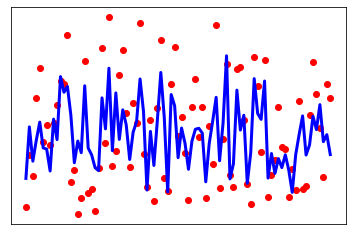

In [16]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print(r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(range(X_test.shape[0]), y_test, color='red')
plt.plot(range(X_test.shape[0]), y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show();

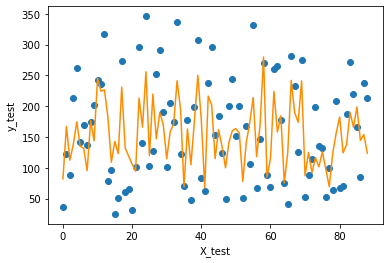

In [17]:
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']

plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.show();

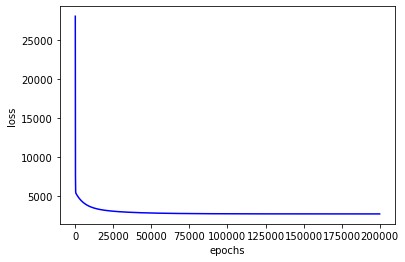

In [18]:
plt.plot(loss_his, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()